# Pearson's correlation coefficient

The correlation function in scores calculates the Pearson's correlation coefficient.

In [1]:
from scores.continuous import correlation, mse

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import warnings
import xarray as xr

In [2]:
# Uncomment the line below to view detailed help information on the arguments to the correlation function
# help(correlation)

We create synthetic observations with two forecast systems. Forecast system 1 is identical to the observations but has a constant bias introduced. In contrast, forecast system 2 predicts random values around a mean value close to that of the observations.

In [3]:
obs = 10 * np.random.random((50, 50))
obs = xr.DataArray(
    data=obs, 
    dims=["time", "x"],
    coords={"time": pd.date_range("2023-01-01", "2023-02-19"), "x": np.arange(0, 50)}
)

# Create forecasts
fcst1 = obs - 4

fcst2 = 4.5 + np.random.random((50, 50))
fcst2 = xr.DataArray(
    data=fcst2, 
    dims=["time", "x"],
    coords={"time": pd.date_range("2023-01-01", "2023-02-19"), "x": np.arange(0, 50)}
)

In [4]:
# First let's calculate the MSE of each forecast system
mse1 = mse(fcst1, obs).item()
mse2 = mse(fcst2, obs).item()
print(f"MSE of forecast system 1 = {mse1:.3}")
print(f"MSE of forecast system 2 = {mse2:.3}")

MSE of forecast system 1 = 16.0
MSE of forecast system 2 = 8.15


The MSE of forecast system 2 is better (lower).

Let's visualise the time series of forecast 1 against the observations.

Text(0.5, 1.0, 'Perfectly correlated forecast and observations')

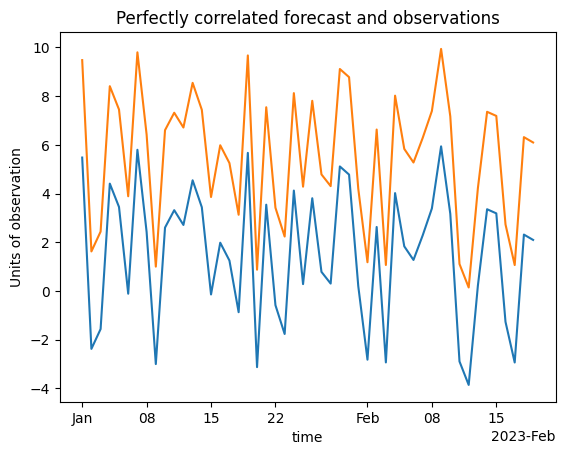

In [5]:
# Let's view a time series of forecast 1 and observations for a single point

fcst1.sel(x=0).drop_vars(["x"]).plot()
obs.sel(x=0).drop_vars(["x"]).plot()
plt.ylabel("Units of observation")
plt.title("Perfectly correlated forecast and observations")

There is a close relationship between forecast 1 and observation data despite the bias. We can plot the forecast values against the observed values.

Text(0.5, 0, 'Observed values')

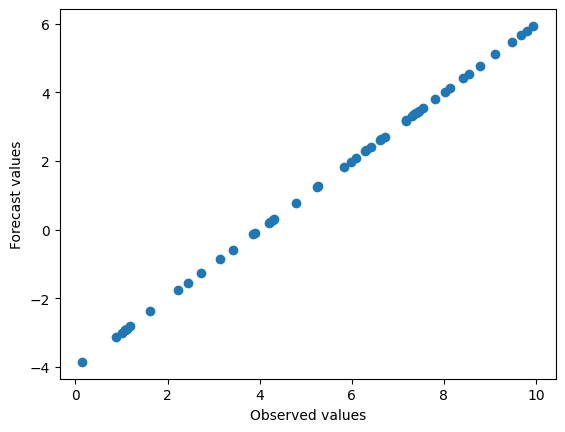

In [6]:
plt.scatter(obs.sel(x=0).values, fcst1.sel(x=0).values)
plt.ylabel("Forecast values")
plt.xlabel("Observed values")

We can see that there is a perfect linear relationship.

Now let's plot the time series for forecast 2 together with the observations.

Text(0.5, 1.0, 'Poorly correlated forecast and observations')

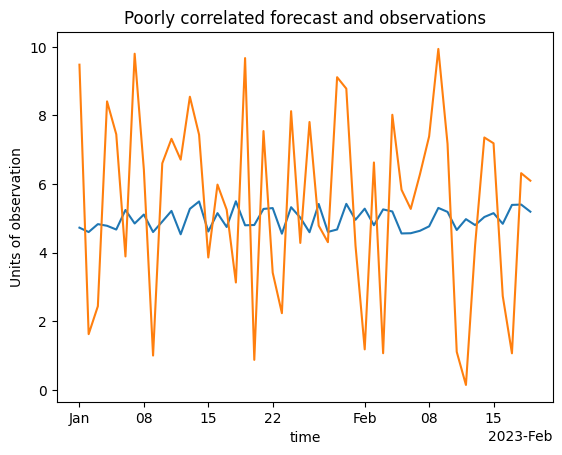

In [7]:
# Let's view a time series of forecast 2 and observations for a single point
fcst2.sel(x=0).drop_vars(["x"]).plot()
obs.sel(x=0).drop_vars(["x"]).plot()
plt.ylabel("Units of observation")
plt.title("Poorly correlated forecast and observations")

We can see that there does not appear to be a relationship between forecast system 2 and the observations. Let's plot the forecast values against the observed values.



Text(0.5, 0, 'Observed values')

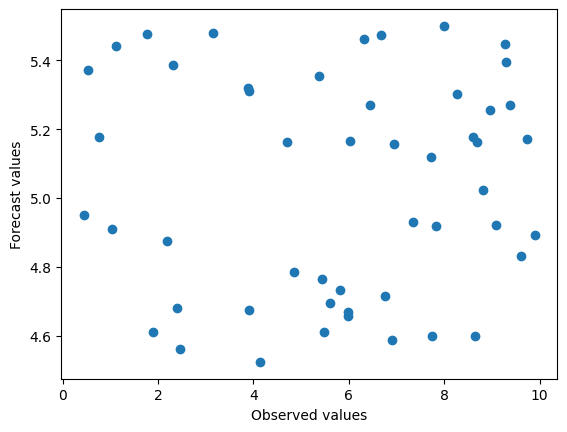

In [8]:
plt.scatter(obs.sel(x=0).values, fcst2.sel(x=0).values)
plt.ylabel("Forecast values")
plt.xlabel("Observed values")

We can see that there is no linear relationship.

Correlation can be useful to calculate how close the linear relationship is between forecasts and observations if we are not concerned about bias. A value of 1 indicates a perfect linear relationship, while a value of 0 indicates no linear relationship. A value of -1 indidicates that the data is perfectly negatively correlated.

In [9]:
#Let's calculate the correlation of each forecast system
corr1 = correlation(fcst1, obs).item()
corr2 = correlation(fcst2, obs).item()
print(f"The correlation between forecast system 1 and the observations = {corr1:.2f}")
print(f"The correlation between forecast system 2 and the observations = {corr2:.2f}")

The correlation between forecast system 1 and the observations = 1.00
The correlation between forecast system 2 and the observations = 0.01


We can see that forecast system 1 has a greater correlation with the observations than forecast system 2 does. It's worth noting that forecast system 1 had a poorer MSE than forecast system 2. In this synthetic experiment, forecast system 1 could easily be bias corrected to outperform forecast system 2 when measured by MSE.

For further information on the Pearson's correlation coefficient see [https://en.wikipedia.org/wiki/Pearson_correlation_coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)